## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import timeit

## Loading data & preprocessing

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()

In [3]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
df = pd.DataFrame(boston_data['data'], columns= boston_data.feature_names)
df['MEDV'] = boston_data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
from sklearn.preprocessing import StandardScaler
df_scale = StandardScaler().fit_transform(df)

In [7]:
columns = np.append(boston_data['feature_names'], 'MEDV')

In [8]:
df = pd.DataFrame(df_scale, columns=columns)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-1.123388e-16,7.898820e-17,2.106352e-16,-3.510587e-17,-1.965929e-16,-1.088282e-16,-1.474446e-16,-8.425408e-17,-1.123388e-16,0.000000,-4.212704e-16,-7.442444e-16,-3.089316e-16,-5.195668e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990,-2.707379e+00,-3.907193e+00,-1.531127e+00,-1.908226e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-0.767576,-4.880391e-01,2.050715e-01,-7.994200e-01,-5.994557e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-0.464673,2.748590e-01,3.811865e-01,-1.812536e-01,-1.450593e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926,8.065758e-01,4.336510e-01,6.030188e-01,2.685231e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194,1.638828e+00,4.410519e-01,3.548771e+00,2.989460e+00


## EDA

/home/tm/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


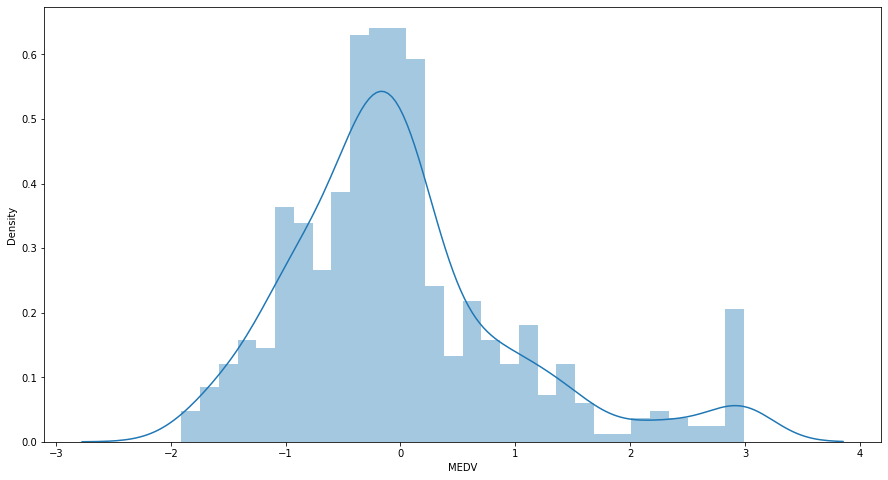

In [9]:
# sns.set(rc={'figure.figsize':(15,8)})
plt.figure(figsize=(15,8))
sns.distplot(df['MEDV'], bins=30)
plt.show()

<AxesSubplot:>

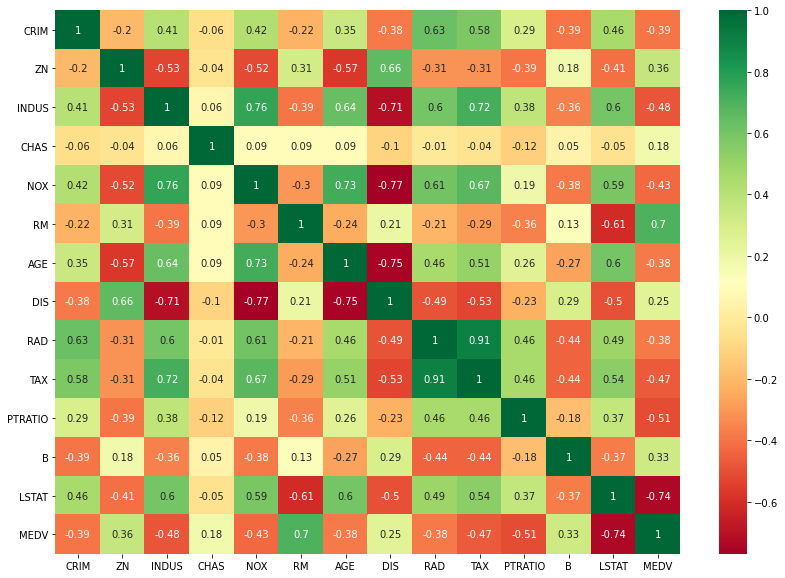

In [10]:
corr = df.corr().round(2)
plt.figure(figsize=(14,10))
sns.heatmap(data=corr, annot=True, cmap = 'RdYlGn')

Choose RM & LSTAT

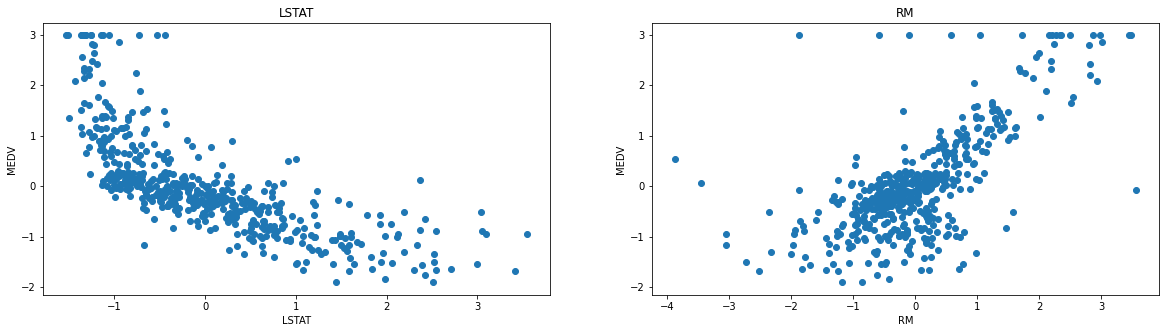

In [11]:
plt.figure(figsize=(20, 5))
features = ['LSTAT', 'RM']
target = df['MEDV']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

## Train test split

In [12]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [13]:
X_train = np.c_[np.ones(X_train.shape[0]),X_train]
X_test = np.c_[np.ones(X_test.shape[0]),X_test]
X_train

array([[ 1.        ,  1.7181012 , -1.39706929],
       [ 1.        , -0.5863558 , -0.64200019],
       [ 1.        , -0.67606702, -0.36134243],
       ...,
       [ 1.        , -0.93398678,  0.49915141],
       [ 1.        ,  1.48821619,  0.49060346],
       [ 1.        , -0.28358043,  0.17147991]])

## GD

Step 1: adding a column of ones to X

Step 2: Guess/Random $\theta$

$$
\theta_{(n+1)*1} \implies \theta_0, \theta_1, ..., \theta_n
$$

Step 3: Predict the y values

$$
pred^{(i)} = \theta_0 * 1 + \sum_{i=1}^n \theta_i X_i
$$

Step 4: Calculate the error
$$
residuals = \frac{1}{n} \sum_{i=1}^n \left(y_i - y\char`_pred_{i}^2 \right)
$$

Step 5: Calculate the cost function
$$
cost = \frac{1}{2n} \sum_{i=1}^n \left( residuals^2 \right)
$$

Step 6: Update $\theta$

$$
\theta\char`_new = \theta - step\char`_size * \left( \frac{1}{n}\right) * \sum_{i=1}^n residuals * x
$$

Step 7: Repeat till the change in the cost function is negligible

### Code implement

$\mathcal{L}(\mathbf{w}) = \frac{1}{2N}||\mathbf{y - \bar{X}w}||_2^2$

In [14]:
def cost(X, y, theta):
    residual = np.dot(X, theta) - y
    return 1/(2 * X.shape[0]) * np.sum(residual**2)

$\nabla_{\mathbf{w}}\mathcal{L}(\mathbf{w}) = \frac{1}{N}\mathbf{\bar{X}}^T \mathbf{(\bar{X}w - y)}$

In [15]:
def grad(X, y, theta):
    residual = np.dot(X, theta) - y
    return 1/X.shape[0] * np.dot(X.T, residual)

Gradient descent with fixed step size t ≤ 1/L satisfies
f(x(k)) − f∗ ≤ 1/2tk ||x(0) − x∗||^2
and same result holds for backtracking with t replaced by β/L

In [16]:
def gd(X, y, theta, step_size, tol=1e-9):
    cost_ = []
    theta_ = [theta]
    i = 0
    check_cost_after = 20
    A = 1/X.shape[0] * np.dot(X.T, X)
    b = 1/X.shape[0] * np.dot(X.T, y)
    while True:
        theta_new = theta_[-1] - step_size * grad(X, y, theta_[-1])
        theta_.append(theta_new)
        cost_new = cost(X, y, theta_new)
        cost_.append(cost_new)
        # np.linalg.norm(grad(X, y, theta_new))
        # i > check_cost_after and cost_[-check_cost_after] - cost_[i]
        if np.linalg.norm(grad(X, y, theta_new)) < tol: # **2 / 2*step_size*(i+1)
            print(cost_[i])
            break
        i += 1
    return cost_, theta_

In [17]:
step_size = 0.05
np.random.seed(10)
theta = np.random.rand(3)
tol=1e-3
theta

array([0.77132064, 0.02075195, 0.63364823])

In [18]:
start = timeit.default_timer()
cost_list, theta_list = gd(X_train, Y_train, theta, step_size, tol)
stop = timeit.default_timer()

0.1800060853850456


In [19]:
print('Time: ', stop - start)  
theta = theta_list[-1]
theta

# Intercept - LSTAT coef - RM coef

Time:  0.2151185179991444


array([-0.00340801, -0.48928361,  0.41928661])

In [20]:
len(cost_list)

269

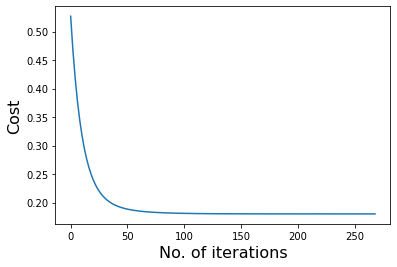

In [21]:
plt.xlabel('No. of iterations', size=16)
plt.ylabel('Cost', size=16)
plt.plot(cost_list)
plt.show()

## Newton

$\nabla_{\mathbf{w}}^2 \mathcal{L}(\mathbf{w}) = \frac{1}{N}\mathbf{\bar{X}}^T \mathbf{\bar{X}}$

In [22]:
def hessian_matrix(X):
    return 1/X.shape[0] * np.matmul(X.T, X)

In [67]:
def newton(X, y, theta, step_size, tol=1e-9):
    cost_ = []
    theta_ = [theta]
    i = 0
    check_cost_after = 20
    hess = np.linalg.inv(hessian_matrix(X))
    while True:
        grad_v = grad(X, y, theta_[-1])
        theta_new = theta_[-1] - step_size * np.matmul(hess, grad_v) 
        theta_.append(theta_new)
        cost_new = cost(X, y, theta_new)
        cost_.append(cost_new)
        if np.linalg.norm(grad(X, y, theta_new)) < tol: 
            print(cost_[i])
            break
        i += 1
    return cost_, theta_

In [24]:
learning_rate = 0.05
np.random.seed(10)
theta = np.random.rand(3)
tol = 1e-3
theta

array([0.77132064, 0.02075195, 0.63364823])

In [26]:
start = timeit.default_timer()
cost_newton_list, theta_newton_list = newton(X_train, Y_train, theta, learning_rate, tol=tol)
stop = timeit.default_timer()

0.1800053296122048


In [27]:
print('Time: ', stop - start)  
theta = theta_newton_list[-1]
theta

Time:  0.13079226599984395


array([-0.00247244, -0.49051442,  0.41775671])

In [28]:
len(cost_newton_list)

132

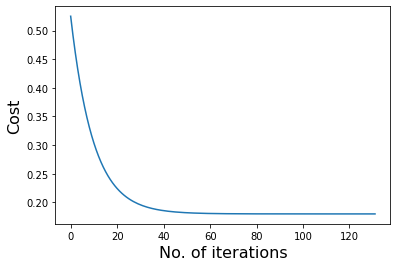

In [29]:
plt.xlabel('No. of iterations', size=16)
plt.ylabel('Cost', size=16)
plt.plot(cost_newton_list)
plt.show()

## Nesterov Accelerated Gradient

In [30]:
def nag(X, y, theta, step_size, gamma, tol=1e-9):
    cost_ = []
    theta_ = [theta]
    v_ = [np.zeros_like(theta)]
    i = 0
    check_cost_after = 20
    while True:
        look_ahead = theta_[-1] - gamma * v_[-1]
        v_new = gamma * v_[-1] + step_size * grad(X, y, look_ahead)
        theta_new = theta_[-1] - v_new
        cost_new = cost(X, y, theta_new)
        v_.append(v_new)
        theta_.append(theta_new)
        cost_.append(cost_new)
        if np.linalg.norm(grad(X, y, theta_new)) < tol: 
            print(cost_[i])
            break
        i += 1
    return cost_, theta_

In [31]:
learning_rate = 0.05
gamma = .8
np.random.seed(10)
theta = np.random.rand(3)
tol = 1e-3
theta

array([0.77132064, 0.02075195, 0.63364823])

In [32]:
start = timeit.default_timer()
cost_nag, theta_nag = nag(X_train, Y_train, theta, learning_rate, gamma, tol=tol)
stop = timeit.default_timer()

0.18000545968414747


In [33]:
print('Time: ', stop - start)  
theta = theta_nag[-1]
theta

Time:  0.06998018199919898


array([-0.00404272, -0.49213295,  0.41654047])

```
Intercept: -0.00240516
LSTAT coef: -0.49141192
RM coef: 0.41706038
```

In [34]:
len(cost_nag)

52

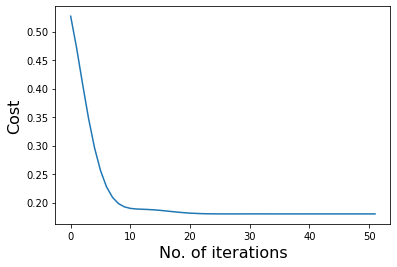

In [35]:
plt.xlabel('No. of iterations', size=16)
plt.ylabel('Cost', size=16)
plt.plot(cost_nag)
plt.show()

## GD Backtracking

In [74]:
def gd_backtrack(X, y, theta, step_size, alpha = .5, beta = .5, tol=1e-9):
    cost_ = []
    theta_ = [theta]
    i = 0
    check_cost_after = 20
    while True:
        t = step_size
        grad_v = grad(X, y, theta_[-1])
        if i > 0:
            fx = cost_[-1]
        else:
            fx = cost(X, y, theta_[-1])
        alpha_norm = alpha * (np.linalg.norm(grad_v)**2)
        while cost(X, y, theta_[-1] - t * grad_v) > fx - t * alpha_norm:
            t = beta * t
            
        theta_new = theta_[-1] - t * grad_v
        theta_.append(theta_new)
        cost_new = cost(X, y, theta_new)
        cost_.append(cost_new)
        if np.linalg.norm(grad(X, y, theta_new)) < tol: 
            print(cost_[i])
            break
        i += 1
    return cost_, theta_

In [75]:
learning_rate = 1
alpha = .5
beta = .8
tol = 1e-3

np.random.seed(10)
theta = np.random.rand(3)
theta

array([0.77132064, 0.02075195, 0.63364823])

In [76]:
start = timeit.default_timer()
cost_gd_backtrack, theta_gd_backtrack = gd_backtrack(X_train, Y_train, theta, learning_rate, alpha, beta, tol=tol)
stop = timeit.default_timer()

0.18000533190487394


In [77]:
print('Time: ', stop - start)  
theta = theta_gd_backtrack[-1]
theta

Time:  0.03399869900022168


array([-0.00340994, -0.48983568,  0.41839912])

In [78]:
len(cost_gd_backtrack)

12

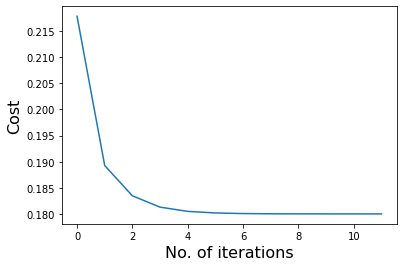

In [79]:
plt.xlabel('No. of iterations', size=16)
plt.ylabel('Cost', size=16)
plt.plot(cost_gd_backtrack)
plt.show()

## Newton backtrack

In [90]:
def newton_backtrack(X, y, theta, step_size, alpha = .5, beta = .5, tol=1e-9):
    cost_ = []
    theta_ = [theta]
    i = 0
    check_cost_after = 20
    hess = np.linalg.inv(hessian_matrix(X))
    while True:
        t = step_size
        grad_v = grad(X, y, theta_[-1])
        if i > 0:
            fx = cost_[-1]
        else:
            fx = cost(X, y, theta_[-1])
        v = -np.matmul(hess, grad_v)
        alpha_matmul = alpha * np.matmul(grad_v.T, v)
        while cost(X, y, theta_[-1] + t * v) > fx + t * alpha_matmul:
            t = beta * t
        theta_new = theta_[-1] + t * v
        theta_.append(theta_new)
        cost_new = cost(X, y, theta_new)
        cost_.append(cost_new)
        if (np.abs(grad(X, y, theta_new)) < tol).all(): 
            print(cost_[i])
            break
        i += 1
    return cost_, theta_

In [96]:
learning_rate = 1
alpha = .5
beta = .8
tol = 1e-6

np.random.seed(10)
theta = np.random.rand(3)
theta

array([0.77132064, 0.02075195, 0.63364823])

In [97]:
start = timeit.default_timer()
cost_ne_bt, theta_ne_bt = newton_backtrack(X_train, Y_train, theta, learning_rate, alpha, beta, tol=tol)
stop = timeit.default_timer()

0.18000482694432507


In [98]:
print('Time: ', stop - start)  
theta = theta_ne_bt[-1]
theta

Time:  0.010190510998654645


array([-0.00336091, -0.49110145,  0.41750882])

In [99]:
len(cost_ne_bt)

2

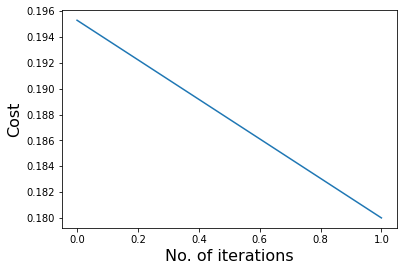

In [100]:
plt.xlabel('No. of iterations', size=16)
plt.ylabel('Cost', size=16)
plt.plot(cost_ne_bt)
plt.show()

## NAG backtrack

In [ ]:
# chua lam duoc
def nag_backtrack(X, y, theta, step_size, gamma, alpha = .5, beta = .5, tol=1e-9):
    cost_ = []
    theta_ = [theta]
    v_ = [np.zeros_like(theta)]
    i = 0
    check_cost_after = 20
    step_size_ = [step_size]
    while True:
        t = step_size_[-1]
        
        look_ahead = theta_[-1] - gamma * v_[-1]
        v_new = gamma * v_[-1] + step_size * grad(X, y, look_ahead)
        theta_new = theta_[-1] - v_new
        cost_new = cost(X, y, theta_new)
        v_.append(v_new)
        theta_.append(theta_new)
        cost_.append(cost_new)
        if np.linalg.norm(grad(X, y, theta_new)) < tol: 
            print(cost_[i])
            break
        i += 1
    return cost_, theta_

## So sánh các phương pháp

### Non backtracking

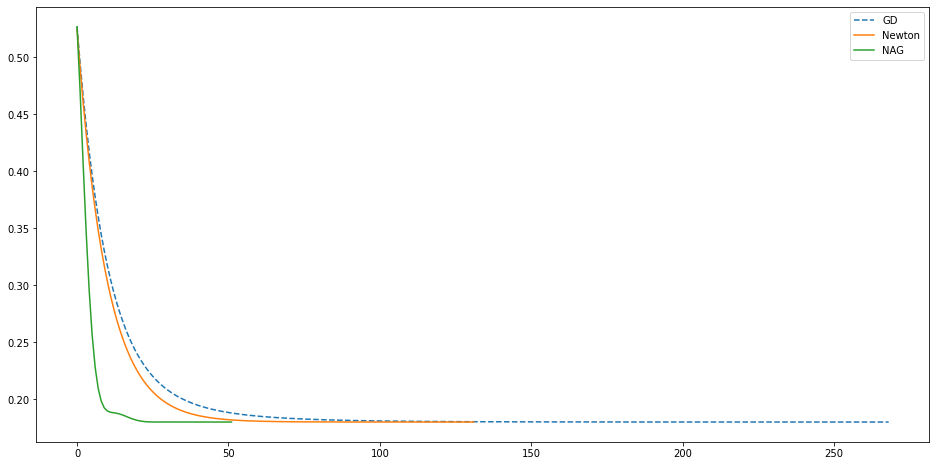

In [66]:
plt.figure(figsize = [16,8])
plt.plot(cost_list,label = "GD", linestyle='dashed')
plt.plot(cost_newton_list,label = "Newton")
plt.plot(cost_nag,label = "NAG")
plt.legend()
plt.show()

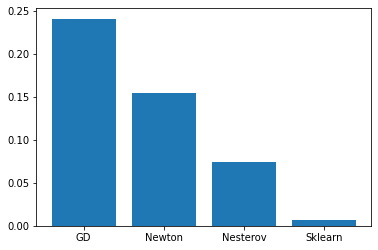

In [58]:
time_list = [0.24052319600014016, 0.15471418900051503, 0.07436803400196368, 0.0065] # 0.41,  'GD backtrack', 
labels = ['GD', 'Newton', 'Nesterov', 'Sklearn']
plt.bar(labels, time_list)
plt.show()

### backtracking

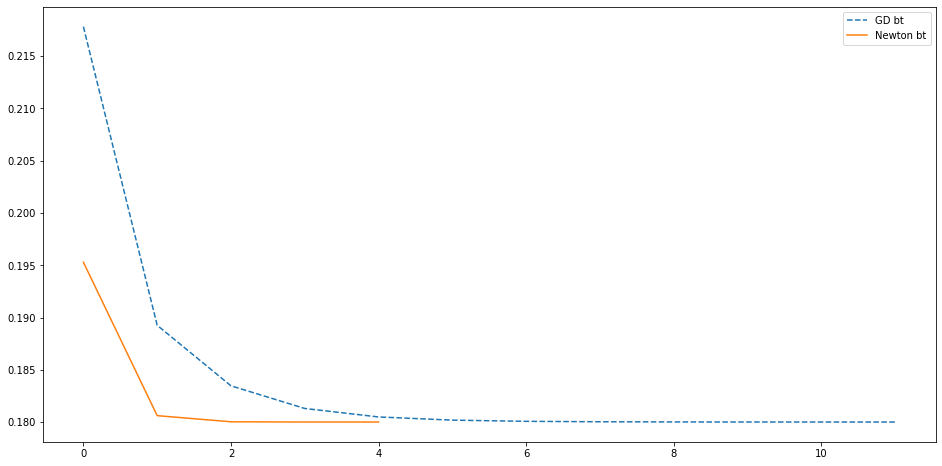

In [384]:
plt.figure(figsize = [16,8])
plt.plot(cost_gd_backtrack,label = "GD bt", linestyle='dashed')
plt.plot(cost_ne_bt,label = "Newton bt")
# plt.plot(cost_nag,label = "NAG")
plt.legend()
plt.show()

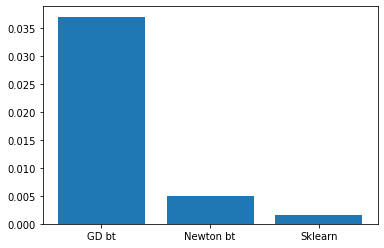

In [59]:
time_list = [0.03704214199751732, 0.0049955679969571065, 0.0016224419996433426]
labels = ['GD bt', 'Newton bt', 'Sklearn']
plt.bar(labels, time_list)
plt.show()

### compare together

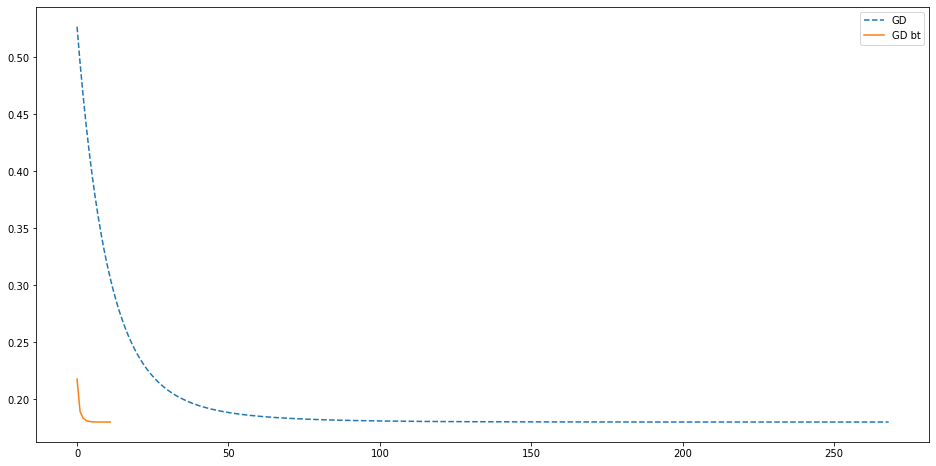

In [60]:
plt.figure(figsize = [16,8])
plt.plot(cost_list,label = "GD", linestyle='dashed')
plt.plot(cost_gd_backtrack,label = "GD bt")
plt.legend()
plt.show()

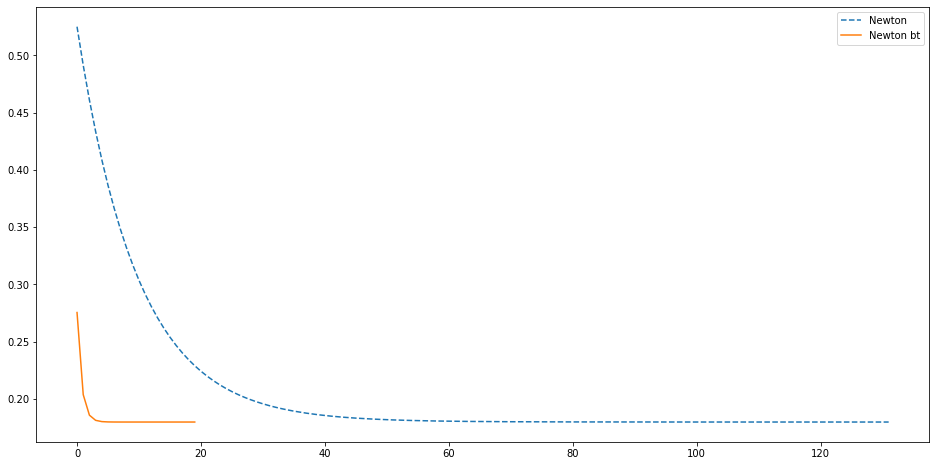

In [61]:
plt.figure(figsize = [16,8])
plt.plot(cost_newton_list,label = "Newton", linestyle='dashed')
plt.plot(cost_ne_bt,label = "Newton bt")
plt.legend()
plt.show()

## Compare with library

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()

In [63]:
X_train.shape

(404, 3)

In [64]:
X_train_del = np.delete(X_train, 0, 1)
X_train_del.shape

(404, 2)

In [65]:
start_lib = timeit.default_timer()
lr.fit(X_train_del, Y_train)
stop_lib = timeit.default_timer()
print("Time:", (stop_lib - start_lib))
lr.coef_, lr.intercept_

Time: 0.006922885999301798


(array([-0.49110145,  0.41750882]), -0.0033609053781658432)

In [170]:
tmp = np.c_[[-0.00340801, -0.48928361, 0.41928661, 0.2266],
[-0.00247244, -0.49051442,  0.41775671, 0.1271],
[-0.00404272, -0.49213295,  0.41654047, 0.071],
[-0.003361, -0.49110145,  0.41750882, 0.0016]].T

cols = ["Intercept", "LSTAT coef", "RM coef", "Time"]
res = pd.DataFrame(tmp, columns=cols)
res = res.rename(index={'0': 'GD', '1': 'Newton', '2': 'Nesterov', '3': 'Lib'})

## Đánh giá chất lượng mô hình
Chúng ta sẽ dùng Căn bậc 2 của trung bình bình phương sai số (RMSE) và hệ số xác định ($R^2$ score) để đánh giá mô hình. <br/>
RMSE là căn bậc 2 của tổng bình phương phần dư. RMSE được định nghĩa như sau:
$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (h(x^i) - y^i)^2}
$$

In [343]:
def predict(X, theta):
    return np.dot(X, theta)

In [347]:
# GD
gd_coef = theta_list[-1]
print(gd_coef)

# Newton
ne_coef = theta_newton_list[-1]
print(ne_coef)

# Nesterov
nag_coef = theta_nag[-1]
print(nag_coef)

# GD bt
gd_bt_coef = theta_gd_backtrack[-1]
print(gd_bt_coef)

# Newton backtrack
ne_bt_coef = theta_ne_bt[-1]
print(ne_bt_coef)

[-0.00340801 -0.48928361  0.41928661]
[-0.00247244 -0.49051442  0.41775671]
[-0.00404272 -0.49213295  0.41654047]
[-0.00340994 -0.48983568  0.41839912]
[-0.00336091 -0.49110145  0.41750882]


In [348]:
X_test.shape

(102, 3)

In [349]:
y_pred_test_gd = predict(X_test, gd_coef)
y_pred_test_ne = predict(X_test, ne_coef)
y_pred_test_nag = predict(X_test, nag_coef)
y_pred_test_gd_bt = predict(X_test, gd_bt_coef)
y_pred_test_ne_bt = predict(X_test, ne_bt_coef)
# y_pred_test_nag = predict(X_test, nag_coef)

In [350]:
def cal_rmse(y_pred):
    # mean squared error
    mse = np.sum((y_pred - Y_test)**2)
    # root mean squared error
    return np.sqrt(mse/Y_test.shape[0])

In [351]:
# sum of square of residuals
def cal_ssr(y_pred):
    return np.sum((y_pred - Y_test)**2)

In [354]:
#  total sum of squares
def cal_sst():
    return np.sum((Y_test - np.mean(Y_test))**2)

In [353]:
rmse_gd = cal_rmse(y_pred_test_gd)
rmse_ne = cal_rmse(y_pred_test_ne)
rmse_nag = cal_rmse(y_pred_test_nag)
rmse_gd_bt = cal_rmse(y_pred_test_gd_bt)
rmse_ne_bt = cal_rmse(y_pred_test_ne_bt)

In [358]:
print(rmse_gd)
print(rmse_ne)
print(rmse_nag)
print(rmse_gd_bt)
print(rmse_ne_bt)

0.6085560092189206
0.6083324104221186
0.6082696787664666
0.6084279168397216
0.6083546779594221


$R^2 score$ là hệ số xác định, giải thích tổng phương sai của biến độc lập có thể giảm bao nhiêu sử dụng hồi quy bình phương nhỏ nhất. Được xác định bởi:
$$
R^2 = 1 - \frac{SS_r}{SS_t}
$$
trong đó:<br/>
**$SS_t$**: tổng sai số nếu lấy giá trị trung bình của các quan sát làm giá trị dự đoán.
$$
SS_t = \sum_{i=1}^{m} (y^i - \hat{y})^2
$$
**$SS_r$** là tổng bình phương phần dư.
$$
SS_r = \sum_{i=1}^m (h(x^i) - y^i)^2
$$

In [356]:
sst = cal_sst()
# GD R2 score
r2_score_gd = 1 - (cal_ssr(y_pred_test_gd)/sst)
r2_score_ne = 1 - (cal_ssr(y_pred_test_ne)/sst)
r2_score_nag = 1 - (cal_ssr(y_pred_test_nag)/sst)
r2_score_gd_bt = 1 - (cal_ssr(y_pred_test_gd_bt)/sst)
r2_score_ne_bt = 1 - (cal_ssr(y_pred_test_ne_bt)/sst)

In [357]:
print(r2_score_gd)
print(r2_score_ne)
print(r2_score_nag)
print(r2_score_gd_bt)
print(r2_score_ne_bt)

0.5736757026819106
0.5739889296847549
0.5740767862624777
0.5738551541885235
0.573957741502586


Nếu ta sử dụng trung bình của các giá trị quan sát làm giá trị dự đoán, phương sai sẽ = 69.5, nếu sử dụng hồi quy, tổng phương sai chỉ là 7.64. Ta giảm được sai số dự đoán xấp xỉ 89% bằng cách sử dụng hồi quy. 

In [359]:
X_test_del = np.delete(X_test, 0, 1)
X_test_del.shape

(102, 2)

In [360]:
# model evaluation for training set
# y_train_predict = lr.predict(X_train_del)
# rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
# r2 = r2_score(Y_train, y_train_predict)

# print("The model performance for training set")
# print("--------------------------------------")
# print('RMSE is {}'.format(rmse))
# print('R2 score is {}'.format(r2))
# print("\n")

# model evaluation for testing set
y_test_predict = lr.predict(X_test_del)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 0.6083546779594221
R2 score is 0.573957741502586
